### EDA and ML Pipeline

### Import 

In [14]:
'''
import subprocess
from pathlib import Path
import pandas as pd

try:
    repo_root = subprocess.run(
        ["git", "rev-parse", "--show-toplevel"],
        capture_output=True,
        text=True,
        check=True
    ).stdout.strip()
except subprocess.CalledProcessError:
    repo_root = Path.cwd()  # fallback if not in a git repo

csv_path = Path(repo_root) / "FullSimDF.csv"
dog_dat = pd.read_csv(csv_path)

'''

'\nimport subprocess\nfrom pathlib import Path\nimport pandas as pd\n\ntry:\n    repo_root = subprocess.run(\n        ["git", "rev-parse", "--show-toplevel"],\n        capture_output=True,\n        text=True,\n        check=True\n    ).stdout.strip()\nexcept subprocess.CalledProcessError:\n    repo_root = Path.cwd()  # fallback if not in a git repo\n\ncsv_path = Path(repo_root) / "FullSimDF.csv"\ndog_dat = pd.read_csv(csv_path)\n\n'

In [ ]:
import pandas as pd
import os
# change to your cwd (where your repo is located) - need to make a dynamic path still because not 
# recognizing repo
os.chdir("/Users/ellawileman/Documents/fall2025/VIPR/CoolDawgs_PersonalizationGrp")
dog_dat = pd.read_csv("FullSimDF.csv")

In [17]:
dog_dat.head()

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,Energy Level,Playfulness Level,is_brachycephalic,...,Hum_Diff,CBT_simulated,is_old,is_overweight,heat_stress_risk,High_humidity_fordogs,prior_heat_related_injury_est,simulated_heat_injury_flag,target2Category,target3Category
0,Rottweiler,7.4,18.2,Female,Gray,Short,Smooth,3.0,4.0,0.0,...,1.73,38.247775,0,0,0,0,0.000,0,0,Normal
1,Poodle,11.3,61.3,Male,Brindle,Long,Curly,4.0,5.0,0.0,...,9.73,39.811340,0,0,0,1,0.022,0,1,Heat Stress
2,Airedale Terrier,10.0,37.5,Male,Merle,Short,Wiry,3.0,3.0,0.0,...,4.71,38.629803,0,0,0,1,0.012,0,0,Normal
3,Havanese,6.5,52.6,Male,Red,Long,Double,3.0,5.0,0.0,...,8.38,39.634108,0,0,0,0,0.002,0,0,Normal
4,Labrador Retriever,5.8,45.4,Female,Black and Tan,Short,Double,5.0,5.0,0.0,...,6.47,39.268502,0,0,0,0,0.022,0,0,Normal


In [ ]:
# column names
dog_dat.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'Energy Level', 'Playfulness Level', 'is_brachycephalic',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect', 'Station_Temp',
       'Station_Humidity', 'Ambient_Temp', 'Ambient_Humidity', 'T_device',
       'H_device', 'breed_wt_mu', 'breed_wt_sd', 'ideal_weight',
       'pct_of_ideal', 'BCS_cont', 'BCS', 'Temp_Diff', 'Hum_Diff',
       'CBT_simulated', 'is_old', 'is_overweight', 'heat_stress_risk',
       'High_humidity_fordogs', 'prior_heat_related_injury_est',
       'simulated_heat_injury_flag', 'target2Category', 'target3Category'],
      dtype='object')

## EDA

In [47]:
import matplotlib.pyplot as plt

### Univariate

(array([2.000e+00, 8.000e+00, 1.200e+01, 4.700e+01, 1.270e+02, 2.370e+02,
        4.750e+02, 7.730e+02, 1.187e+03, 1.319e+03, 1.356e+03, 1.328e+03,
        9.540e+02, 7.580e+02, 3.890e+02, 2.240e+02, 8.400e+01, 3.900e+01,
        1.500e+01, 1.000e+00]),
 array([-8.6  , -7.055, -5.51 , -3.965, -2.42 , -0.875,  0.67 ,  2.215,
         3.76 ,  5.305,  6.85 ,  8.395,  9.94 , 11.485, 13.03 , 14.575,
        16.12 , 17.665, 19.21 , 20.755, 22.3  ]),
 <BarContainer object of 20 artists>)

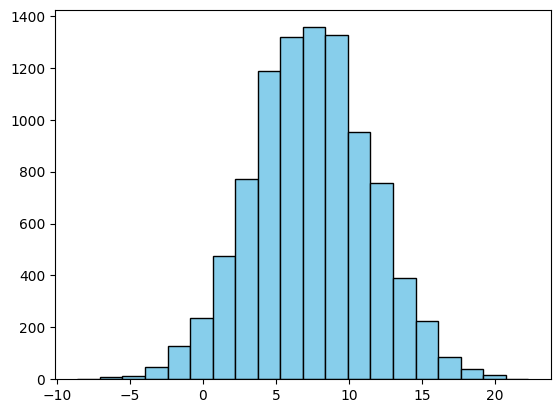

In [ ]:
# Ella
plt.hist(dog_dat['Age'], bins=20, color='skyblue', edgecolor='black')
# Age is normally distributed about 7 years

In [ ]:
# Kedar

In [ ]:
# Swapnil

In [ ]:
# Manaswi

### Bivariate

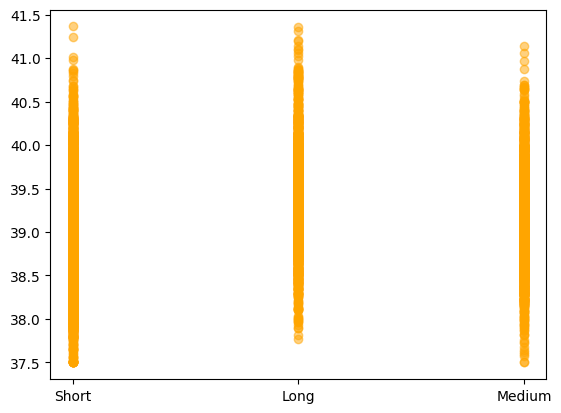

In [ ]:
# Ella
plt.scatter(dog_dat['Coat Length'], dog_dat['CBT_simulated'], alpha=0.5, color='orange')
# No clear correlation between coat length and CBT, looks like short and medium tend to have slightly lower 
# minimums of CBT but not by much

In [ ]:
# Kedar

In [ ]:
# Swapnil

In [ ]:
# Manaswi

## Predicting Target Class

In [31]:
# Drop the target columns from X, and core body temp
X = dog_dat.drop(columns=['target2Category', 'target3Category', 'CBT_simulated'])
# Assume X is your feature set without targets
numeric_features = X.select_dtypes(include=['int64', 'float64'])
categorical_features = X.select_dtypes(include=['object', 'category'])
# One-hot encode categorical features
X_cat_encoded = pd.get_dummies(categorical_features, drop_first=True)
X_encoded = pd.concat([numeric_features, X_cat_encoded], axis=1)

# Binary target
y2 = dog_dat['target2Category']

# 3-class target
y3 = dog_dat['target3Category']
y3_num = y3.astype('category').cat.codes

### Using Binary Target Class

In [35]:
# correlation-based feature selection 
df2 = X_encoded.copy()
df2['target2'] = y2
corr_matrix2 = df2.corr()
target_corr2 = corr_matrix2['target2'].drop('target2')
print("Feature correlations with 2-class target:")
print(target_corr2.sort_values(ascending=False))


Feature correlations with 2-class target:
T_device               0.385201
Ambient_Temp           0.322780
Temp_Diff              0.318263
Sun Exposure           0.280342
Hum_Diff               0.277263
                         ...   
Season_Spring         -0.045017
Coat Type_Smooth      -0.127243
Coat Length_Short     -0.146870
Season_Winter         -0.167492
Wind Cooling Effect   -0.169478
Name: target2, Length: 104, dtype: float64


In [43]:
relevant_features2 = target_corr2[abs(target_corr2) > 0.1].index  # keep features with |corr| > 0.1
X2_filtered = X_encoded[relevant_features2]
X2_filtered.shape

(9335, 16)

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
# Binary target train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_filtered, y2, test_size=0.2, random_state=42, stratify=y2
)

In [39]:
# SMOTE for balancing classes (only to training)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X2_train_res, y2_train_res = smote.fit_resample(X2_train, y2_train)
print("Original class distribution:\n", y2_train.value_counts())
print("After SMOTE:\n", y2_train_res.value_counts())


Original class distribution:
 target2Category
0    6521
1     947
Name: count, dtype: int64
After SMOTE:
 target2Category
0    6521
1    6521
Name: count, dtype: int64


### Using Three Class Target

In [36]:
# correlation-based feature selection
# 3-class target: convert to numeric

df3 = X_encoded.copy()
df3['target3'] = y3_num
corr_matrix3 = df3.corr()
target_corr3 = corr_matrix3['target3'].drop('target3')

print("Feature correlations with 3-class target:")
print(target_corr3.sort_values(ascending=False))


Feature correlations with 3-class target:
Season_Winter          0.165393
Wind Cooling Effect    0.164387
Coat Length_Short      0.142733
Coat Type_Smooth       0.124059
Season_Spring          0.042240
                         ...   
Hum_Diff              -0.266873
Sun Exposure          -0.270004
Temp_Diff             -0.306061
Ambient_Temp          -0.310144
T_device              -0.370224
Name: target3, Length: 104, dtype: float64


In [44]:
relevant_features3 = target_corr3[abs(target_corr3) > 0.1].index
X3_filtered = X_encoded[relevant_features3]
X3_filtered.shape

(9335, 16)

In [ ]:
# Train test split
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3_filtered, y3, test_size=0.2, random_state=42, stratify=y3
)

In [41]:
# SMOTE with 3 classes (training only)
smote3 = SMOTE(random_state=42)
X3_train_res, y3_train_res = smote3.fit_resample(X3_train, y3_train)
print("Original class distribution:\n", y3_train.value_counts())
print("After SMOTE:\n", y3_train_res.value_counts())

Original class distribution:
 target3Category
Normal         6521
Heat Stress     901
Heat Stroke      46
Name: count, dtype: int64
After SMOTE:
 target3Category
Normal         6521
Heat Stress    6521
Heat Stroke    6521
Name: count, dtype: int64


Now we are ready to fit ML models below (Use 2-class training and testing or 3-class training and testing) 
-  If you want to use a BINARY CLASSIFIER MODEL: X2_train_res, X2_test, y2_train_res, y2_test
- If you want to use a MULTI-CLASS CLASSIFIER MODEL: X3_train_res, X3_test, y3_train_res, y3_test

In [45]:
import sklearn

In [ ]:
# Ella

In [ ]:
# Swapnil

In [ ]:
# Kedar

In [ ]:
# Manaswi